In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from IPython.display import display
import mglearn
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.27
Test set score: 0.26
Number of features used: 3


In [5]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter
lasso001 = Lasso(alpha=0.01,  max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.89
Test set score: 0.80
Number of features used: 34


In [7]:
lasso00001 = Lasso(alpha=0.0001,  max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.81
Number of features used: 95


(-25, 25)

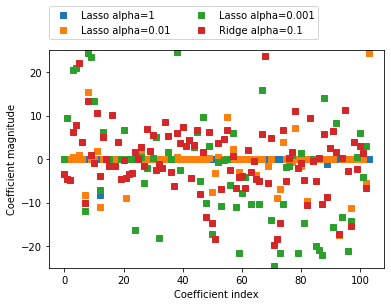

In [8]:
from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 's', label="Lasso alpha=0.001")

plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-25,25)
